In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv('C:\PROJECTTS\Stroke_Project\healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [49]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [50]:
df.dropna(inplace=True)

In [51]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [52]:
# Encoding  Individual Columns and saving the transformers
encoders = {}
df = df.copy()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() # ---------------------------------------------------------- Instantiate encoding library
for i in df.columns: # ------------------------------------------------------ iterate through the columns and find all categoricals
    if df[i].dtypes == 'O': # ----------------------------------------------- select all categoricals
        df[i] = lb.fit_transform(df[i]) # -------------------------------- Transform the selected df.
        encoders[i + '_encoded'] = lb
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [53]:
df.drop(['id'],axis = 1,inplace = True)

<Axes: xlabel='stroke', ylabel='count'>

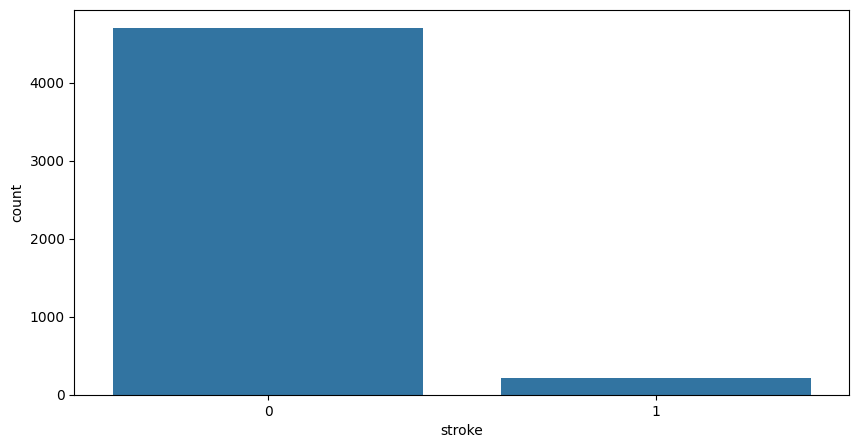

In [54]:
df.stroke.unique()
sns.countplot(x =df.stroke)

In [55]:
x = df.drop('stroke', axis = 1)
y = df.stroke

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print('ytrain: {}'.format(ytrain.shape))
print('ytest: {}'.format(ytest.shape))

xtrain: (3927, 10)
xtest: (982, 10)
ytrain: (3927,)
ytest: (982,)


In [24]:
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
unique,count= np.unique(ytrain, return_counts = True)
y_train_dict_value_count= {k:v for (k,v) in zip (unique, count)}
y_train_dict_value_count

{0: 3760, 1: 167}

In [57]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset

smote = SMOTE(sampling_strategy='auto', random_state= 10) #  AUTO IT DECIDES ITSELF 
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

In [58]:
unique,count= np.unique(y_resampled, return_counts = True)
y_train_sm_value_count= {k:v for (k,v) in zip (unique, count)}
y_train_sm_value_count

{0: 3760, 1: 3760}

<Axes: xlabel='stroke', ylabel='count'>

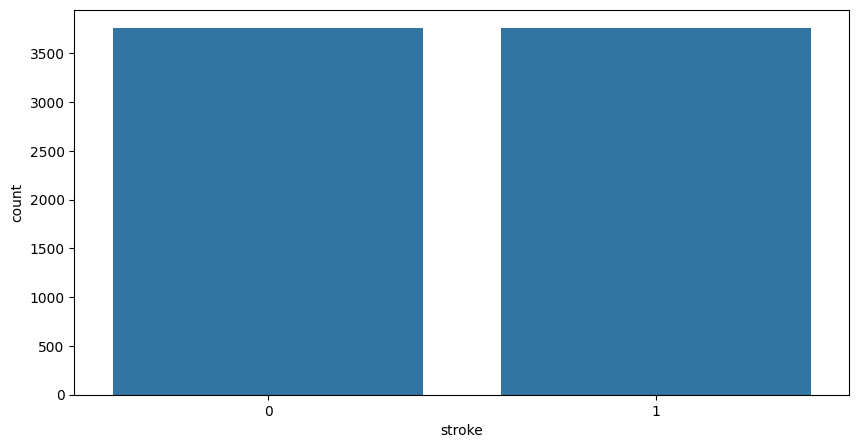

In [59]:
sns.countplot(x = y_resampled)

In [61]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]

table, model1, model2 = modeller(X_resampled, y_resampled, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.912424,1.000000
1,"XGBClassifier(base_score=None, booster=None, c...",0.910387,0.995479
2,DecisionTreeClassifier(),0.875764,1.000000
4,LogisticRegression(),0.783096,0.803324
3,SVC(kernel='poly'),0.776986,0.787367


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3760
           1       1.00      1.00      1.00      3760

    accuracy                           1.00      7520
   macro avg       1.00      1.00      1.00      7520
weighted avg       1.00      1.00      1.00      7520



<Axes: >

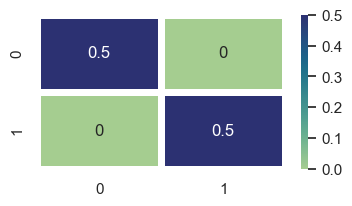

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
Ran_model = RandomForestClassifier()

Ran_model.fit(X_resampled, y_resampled)

cross_validation = Ran_model.predict(X_resampled) # check for underfitting train sample(xtrain)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       909
           1       0.31      0.18      0.23        73

    accuracy                           0.91       982
   macro avg       0.62      0.57      0.59       982
weighted avg       0.89      0.91      0.90       982



<Axes: >

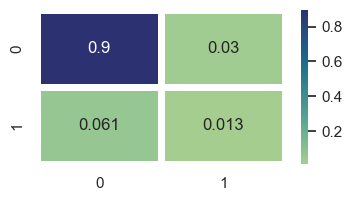

In [63]:
# Check For Overfitting

test_prediction = Ran_model.predict(xtest) # check for overfitting test sample(xtest)
print(classification_report(test_prediction, ytest)) 

revealer = confusion_matrix(test_prediction, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5) # True Positive and True Negative must always be equal to Accuracy Score

In [64]:
# serialise transformers and model
import joblib

joblib.dump(lb,'encoders.pkl') 
joblib.dump(Ran_model,'Stroke_models.pkl') # to save your model to a file

['Stroke_models.pkl']

In [65]:
#import joblib
imported_model = joblib.load('Stroke_models.pkl')
imported_model

RandomForestClassifier()

In [66]:
# new patients sample data to predict the classes of their brain

new_patients = df.sample(10).drop('stroke', axis = 1)
new_patients

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
610,0,56.0,0,0,1,2,0,228.08,29.1,0
883,1,17.0,0,0,0,2,0,68.49,33.2,2
2274,1,22.0,0,0,1,0,1,131.30,27.0,2
3845,0,42.0,0,0,1,0,1,99.94,33.4,2
2278,1,42.0,0,0,1,2,0,145.50,31.8,1
2581,0,35.0,0,0,1,2,1,83.89,25.5,2
4662,1,14.0,0,0,0,2,0,84.41,33.9,2
1589,0,17.0,0,0,0,0,0,115.93,23.3,2
4526,1,60.0,0,0,1,2,1,80.67,33.5,0


In [67]:
imported_model.predict(new_patients)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [68]:
# batch predict and save the predicted patients into a new column called predicted patients
new_patients['predicted_patients'] = imported_model.predict(new_patients)
new_patients

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,predicted_patients
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
610,0,56.0,0,0,1,2,0,228.08,29.1,0,0
883,1,17.0,0,0,0,2,0,68.49,33.2,2,0
2274,1,22.0,0,0,1,0,1,131.30,27.0,2,0
3845,0,42.0,0,0,1,0,1,99.94,33.4,2,0
2278,1,42.0,0,0,1,2,0,145.50,31.8,1,0
2581,0,35.0,0,0,1,2,1,83.89,25.5,2,0
4662,1,14.0,0,0,0,2,0,84.41,33.9,2,0
1589,0,17.0,0,0,0,0,0,115.93,23.3,2,0
4526,1,60.0,0,0,1,2,1,80.67,33.5,0,0
